In [1]:
import numpy as np
import pandas as pd
from pprint import pprint
import astropy
import vaex as vx
from matplotlib import pyplot as plt
from detanalysis import Analyzer
import qetpy as qp
from detprocess import Template
from detprocess import Noise
import pytesdaq.io as h5io
from glob import glob

import warnings
warnings.filterwarnings('ignore')
from pytesdaq.io.hdf5 import H5Reader
from matplotlib.gridspec import GridSpec

#fft stuff
from scipy.fftpack import fft, ifft, fftfreq
from IPython.display import IFrame
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 3.50

In [2]:
IFrame("of_1xnxn_demo_files/OF_filter_1x3x3.pdf", width=1000, height=500)

In [3]:
#Lets call the 1x2x2 and 1x3x3 filter

#We will use this function to instantiate the OF 1x2
def Call_optimal_Filter_object(template_1,template_1_tag, template_2, template_2_tag,  psd ,channel_name, fs, pretrigger_samples, fit_window):
    # instantiate OF1x2
    return qp.OF1x2(of_base=None, template_1_tag=template_1_tag, template_1=template_1,
                template_2_tag=template_2_tag, template_2=template_2, psd=psd, sample_rate=fs,
                 pretrigger_samples=pretrigger_samples, channel= channel_name, fit_window= fit_window)

#We will use this function to instantiate the OF 1x3
def Call_optimal_Filter_object_3(template_1,template_1_tag, template_2, template_2_tag, template_3, template_3_tag,   psd ,channel_name, fs, pretrigger_samples,fit_window):
    # instantiate OF1x2
    return qp.OF1x3(of_base=None, template_1_tag=template_1_tag, template_1=template_1,
                template_2_tag=template_2_tag, template_2=template_2, template_3_tag=template_3_tag, template_3=template_3,
                    psd=psd, sample_rate=fs,
                 pretrigger_samples=pretrigger_samples, channel= channel_name,fit_window= fit_window)

In [5]:
#lets load all the template and noise matrix; in this case i am using the uncorelated noise for both teh channels as I would be fitting these 
#filters separately 


template_dict = np.load('of_1xnxn_demo_files/template_dict.npy',allow_pickle=True)

#lets put the template into a numpy arary for easy of handling
CPD1_scintillation= template_dict.item()['CPD1_scintillation']
CPD1_evaporation= template_dict.item()['CPD1_evaporation']
CPD1_triplet= template_dict.item()['CPD1_triplet']

CPD2_scintillation = template_dict.item()['CPD2_scintillation']
CPD2_evaporation = template_dict.item()['CPD2_evaporation']
CPD2_triplet= template_dict.item()['CPD2_triplet']
t=template_dict.item()['time']

Noise_dict = np.load('of_1xnxn_demo_files/Noise_dict.npy',allow_pickle=True)

psd_CPD1 = Noise_dict.item()['noise_uncorelated_CPD1']
psd_CPD2 = Noise_dict.item()['noise_uncorelated_CPD2']
freq_array = Noise_dict.item()['noise_frequecy']



In [6]:
#Now lets load some traces
traces_triplet= np.load('of_1xnxn_demo_files/traces_triplet.npy')


In [20]:
fs=1250000

OF_1x2_CPD2 = Call_optimal_Filter_object(CPD2_scintillation,'CPD2_scintillation', CPD2_evaporation,'CPD2_evaporation',
                                           psd_CPD2,'CPD2', fs, 2500,  fit_window = [[-625,625],[-65,625]])


#one has to provide some dummy fit window, so as to avoid the error, don't worry you can change the fit window based on each event!  
#ValueError('ERROR in OF1x3: fit_window required cannot handle such big matrices!')
OF_1x3_CPD2 = Call_optimal_Filter_object_3(CPD2_scintillation,'CPD2_scintillation',CPD2_evaporation,'CPD2_evaporation',
                                CPD2_triplet,'CPD2_triplet',psd_CPD2,'CPD2', fs, 2500, fit_window = [[0,1],[1,2],[1250,6250]])



OF_1x2_CPD1 = Call_optimal_Filter_object(CPD1_scintillation,'CPD1_scintillation', CPD1_evaporation,'CPD1_evaporation',
                                           psd_CPD1,'CPD1', fs, 2500,  fit_window = [[-625,625],[-65,625]])


#one has to provide some dummy fit window, so as to avoid the error, don't worry you can change the fit window based on each event!  
#ValueError('ERROR in OF1x3: fit_window required cannot handle such big matrices!')
OF_1x3_CPD1 = Call_optimal_Filter_object_3(CPD1_scintillation,'CPD1_scintillation',CPD1_evaporation,'CPD1_evaporation',
                                CPD1_triplet,'CPD1_triplet',psd_CPD1,'CPD1', fs, 2500, fit_window = [[0,1],[1,2],[1250,6250]])

INFO: Adding template 1 and 2 to OF base object!
INFO: Adding noise PSD to OF base object
INFO: Adding template 1/2/3 to OF base object!
INFO: Adding noise PSD to OF base object
INFO: Adding template 1 and 2 to OF base object!
INFO: Adding noise PSD to OF base object
INFO: Adding template 1/2/3 to OF base object!
INFO: Adding noise PSD to OF base object


1


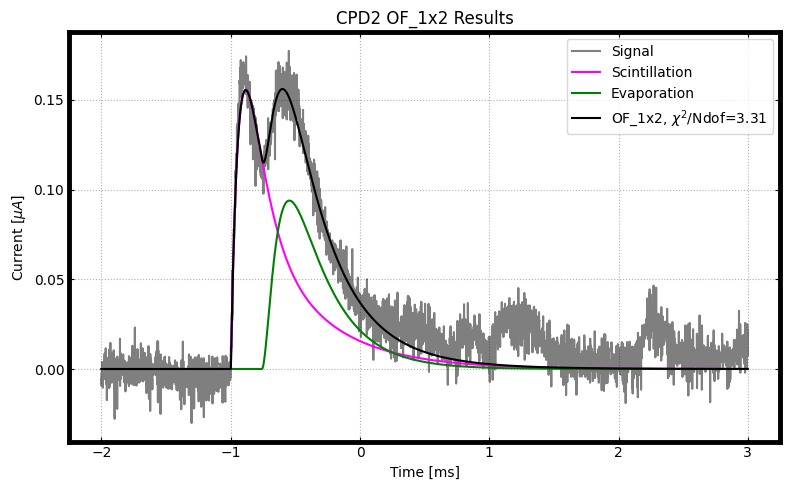

In [21]:
i=1
print(i)
OF_1x2_CPD2.calc(signal = traces_triplet[i][1][:]) 
t1= OF_1x2_CPD2._time_first_pulse
t2= OF_1x2_CPD2._time_second_pulse
OF_1x2_CPD2.plot()

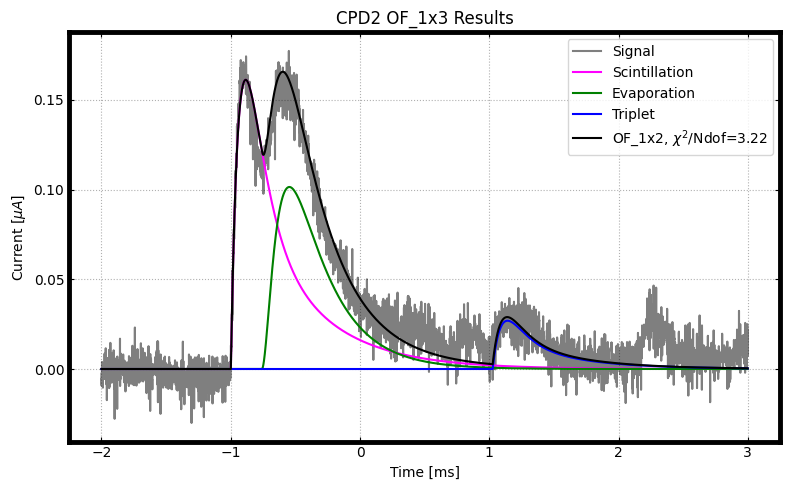

In [22]:
# once we constrain scintillation and evaporation time; we than try to figure out the triplet time

OF_1x3_CPD2.calc(signal = traces_triplet[i][1][:], fit_window = [[t1,t1+1],[t2,t2+1],[t1+1250,t1+5000]])
OF_1x3_CPD2.plot()

In [15]:
#you can obtain the amplitude of various signal 

print("Scintillation amplitude is {0} uA".format(OF_1x3_CPD2._amplitude[OF_1x3_CPD2._template_1_tag]*1e6 ))


print("Evaporation amplitude is {0} uA".format(OF_1x3_CPD2._amplitude[OF_1x3_CPD2._template_2_tag]*1e6 ))

print("Triplet amplitude is {0} uA".format(OF_1x3_CPD2._amplitude[OF_1x3_CPD2._template_3_tag]*1e6 ))

Scintillation amplitude is 0.16111752748382444 uA
Evaporation amplitude is 0.10141378174585158 uA
Triplet amplitude is 0.02690419916519494 uA


In [18]:
#you can obtain the timing of various signal 

print("Scintillation time of arrival is {0} us".format(OF_1x3_CPD2._time_first_pulse ))


print("Evaporation time of arrival is {0} us".format(OF_1x3_CPD2._time_second_pulse ))

print("Triplet time of arrival is {0} us".format(OF_1x3_CPD2._time_third_pulse ))




Scintillation time of arrival is 1 us
Evaporation time of arrival is 302 us
Triplet time of arrival is 2533 us


2


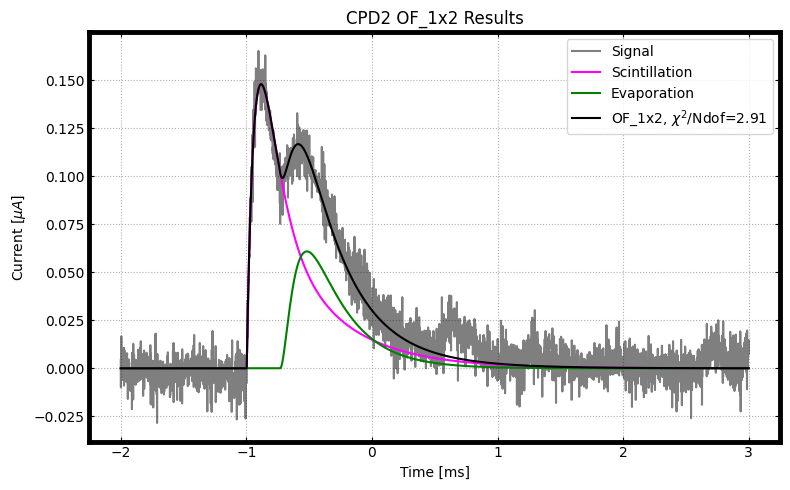

In [24]:
i=2
print(i)

#if you want to look at other signal; first clear the signal 
OF_1x2_CPD2._of_base.clear_signal()
OF_1x2_CPD2.calc(signal = traces_triplet[i][1][:]) 
t1= OF_1x2_CPD2._time_first_pulse
t2= OF_1x2_CPD2._time_second_pulse
OF_1x2_CPD2.plot()

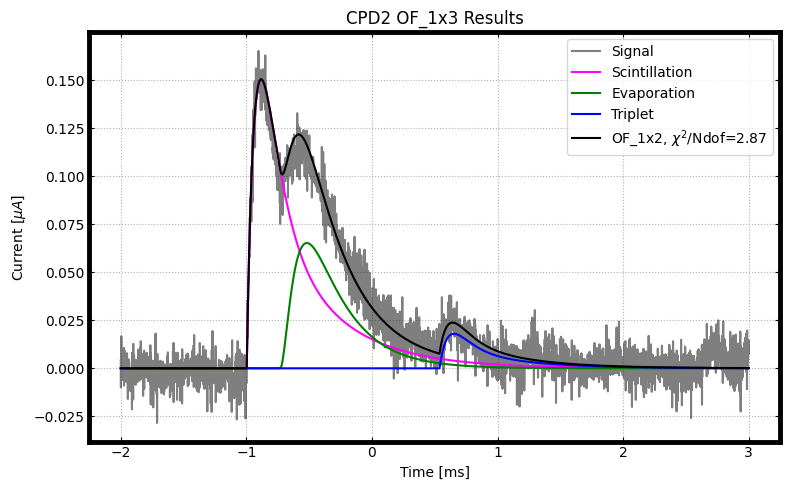

In [25]:
# once we constrain scintillation and evaporation time; we than try to figure out the triplet time; but clear signal first 
OF_1x3_CPD2._of_base.clear_signal()
OF_1x3_CPD2.calc(signal = traces_triplet[i][1][:], fit_window = [[t1,t1+1],[t2,t2+1],[t1+1250,t1+5000]])
OF_1x3_CPD2.plot()